# Lab 3: Hypothesis Testing and Regression in Python

- **Author:** Li Zeng ([lizeng@uw.edu](mailto:lizeng@uw.edu))
- **Date:** 11 April 2016
- **Course:** INFO 371: Core Methods in Data Science

### Learning Objectives:
By the end of the lab, you will be able to:

* feel comfortably designing formulas for linear regression modeling
* work comfortably with statsmodels library 
* create basic visualization of regression model

### Topics:
1. T-tests
2. Univariate regression
3. Multivariate regressions
4. statsmodels
5. Producing regression tables
6. scikit-learn
7. seaborn

### References: 
 * [Scikit Learn Linear Models](http://scikit-learn.org/stable/modules/linear_model.html)
 * [Statsmodels](http://statsmodels.sourceforge.net/stable/index.html)
 * [Introduction to Statistical Learning, Lab #2](http://www-bcf.usc.edu/~gareth/ISL/Chapter%203%20Lab.txt)

### Import libraries

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline  

** Introduce new packages - statsmodels and scipy.stats**

In [147]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

### Import Boston Housing data

In [148]:
from sklearn.datasets import load_boston
bdata = load_boston()

** Take a glance at the shape of data **

In [149]:
print bdata.keys()
print bdata.feature_names
print bdata.data.shape
print bdata.target.shape

['data', 'feature_names', 'DESCR', 'target']
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506L, 13L)
(506L,)


** Convert data structure **

In [150]:
boston = pd.DataFrame(bdata.data)
boston.columns = bdata.feature_names[:]

In [151]:
print boston.head(5)

      CRIM  ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  


In [152]:
boston['MEDV'] = bdata.target

In [153]:
print boston.head(5)

      CRIM  ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


### 1. T-test 

Using simple differences to examine if there is a significant difference in housing price for the neighborhoods where the tract bounds or doesn't bound the Charles River

In [154]:
river_t = boston[boston.CHAS == 1]
river_f = boston[boston.CHAS == 0]

** Did I correctly split the data? **

In [155]:
print river_t['CHAS'].value_counts()
print river_f['CHAS'].value_counts()

1    35
Name: CHAS, dtype: int64
0    471
Name: CHAS, dtype: int64


** Doing T-test **

In [156]:
mean_river_t = river_t['MEDV'].mean()
mean_river_f = river_f['MEDV'].mean()

In [157]:
print 'Average price for neighborhoods near the Charles River:\t', mean_river_t
print 'Average price for neighborhoods not near the Charles River:\t', mean_river_f
tstat, pval = stats.ttest_ind(river_t['MEDV'].fillna(0), river_f['MEDV'].fillna(0))
print 't-stat:\t\t\t', tstat
print 'P-value:\t\t', pval

Average price for neighborhoods near the Charles River:	28.44
Average price for neighborhoods not near the Charles River:	22.0938428875
t-stat:			3.99643746609
P-value:		7.39062317052e-05


** What conclusion we can draw from the p-value? **

### 2. Univariate regression

In the Problem Set 1, we explored the relationship between house prices and crime by scatter plot where a negative correlation is evident. 

** Can you use univariate regression to support the finding? **

In [158]:
uni_mod = smf.ols(formula='MEDV ~ CRIM', data = boston)
uni_result = uni_mod.fit()

ValueError: For numerical factors, num_columns must be an int

Looks like something is wrong above...

** Can you fix it? **

In [14]:
smf.ols?

** View the summary of modeling **

In [ ]:
print uni_result.summary()

** Get estimates of parameters **

In [ ]:
print uni_result.params

** Check the pvalues **

In [ ]:
print uni_result.pvalues

In [ ]:
print uni_result.pvalues[1]

** Plot the regression model **

In the Problem Set 1, we got the following plot:

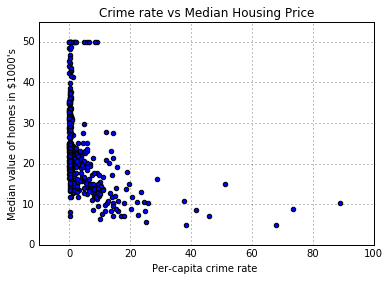

In [15]:
fig, ax = plt.subplots()

ax.scatter(boston['CRIM'], boston['MEDV'])
ax.set_ylabel("Median value of homes in $1000's")
ax.set_xlabel("Per-capita crime rate ")
ax.set_title("Crime rate vs Median Housing Price")
ax.axis([0, 100, 0, 55])
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
ax.set_xlim(-10,100)
ax.grid(True) # Add grid by setting to True

Add a regression line:

In [16]:
y_hat = uni_result.predict()

NameError: name 'uni_result' is not defined

In [ ]:
print y_hat.shape

In [ ]:
fig, ax = plt.subplots()

ax.plot(boston['CRIM'], y_hat, color = 'red')

ax.scatter(boston['CRIM'], boston['MEDV'])
ax.set_ylabel("Median value of homes in $1000's")
ax.set_xlabel("Per-capita crime rate ")
ax.set_title("Crime rate vs Median Housing Price")
ax.axis([0, 100, 0, 55])
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
ax.set_xlim(-10,100)
ax.grid(True) # Add grid by setting to True

### 3.  Multivariate regressions

** If we are interested in more than one independent variables, say both crime rates and nitric oxides concentration: **

In [39]:
mul_mod = smf.ols(formula='MEDV ~ CRIM + NOX', data = boston)
mul_result = mul_mod.fit()
print mul_result.summary()

ValueError: For numerical factors, num_columns must be an int

** Remove intercept **

In [ ]:
no_intcpt_mod = smf.ols(formula='MEDV ~ CRIM + CHAS - 1', data = boston)
no_intcpt_result = no_intcpt_mod.fit()
print no_intcpt_result.summary()

** Exercise:  **

Create a linear regression between house price and average number of rooms per dwelling; then, create a visualization showing your model

In [ ]:
# Edit me!

****

** Interaction terms **

In [ ]:
itr_mod = smf.ols(formula='MEDV ~ CRIM * CHAS', data = boston)
itr_result = itr_mod.fit()
print itr_result.summary()

** Non-linear transformation of the predictors **

In [ ]:
non_linear_mod = smf.ols(formula='MEDV ~ CRIM + np.power(CRIM, 2)', data = boston)
non_linear_result = non_linear_mod.fit()
print non_linear_result.summary()

### Tabular representation of regression model

In [ ]:
final_mod = smf.ols(formula='MEDV ~ CRIM + NOX + CHAS + np.log(TAX)', data = boston)
final_result = final_mod.fit()
print final_result.summary()

In [ ]:
print final_result.params

In [ ]:
v_name = final_result.params.index

In [ ]:
result_df = pd.DataFrame(columns=['Coefficient','Standard Error','P-Value'], index = v_name)
result_df

In [ ]:
result_df['Coefficient'] = final_result.params
result_df['Standard Error'] = final_result.bse
result_df['P-Value'] = final_result.pvalues

In [ ]:
result_df

### To learn more: Scikit-learn library for linear regression and Seaborn library for visualization

In [ ]:
import seaborn as sns
sns.set(style="ticks")

# Show the results of a linear regression within each dataset
sns.lmplot(x="CRIM", y="MEDV", data=boston,
            ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

** Exercise:  **

A) Using multiple regression, construct a model of your chosing to examine the relationship between house price other variables in the data set.

In [ ]:
# Edit me!

B) Create a visualization showing your model

In [ ]:
# Edit me!